# Part 2

In [2]:
#Imports Section

import networkx as nx
import numpy as np
from tqdm import tqdm
import netwulf
import random
import copy
import matplotlib.pyplot as plt
import community

## Exercise 1

In [3]:
#Defining the karateclub data as a function

karclub_data = nx.karate_club_graph()

In [4]:
#Setting the color of each node based on the club split

karclub_data
club_membership = nx.get_node_attributes(karclub_data, "club")

In [5]:
#setting the colors of different club nodes
colors = {}
clubs = []#For use later
mrhi_members = []
officer_members = []

for node in range(len(karclub_data.nodes)):
    if club_membership[node] == 'Mr. Hi': 
        colors[node] = "blue"
        mrhi_members.append(node)
    else:
        colors[node] = "red"
        officer_members.append(node)

clubs.append(mrhi_members)
clubs.append(officer_members)
nx.set_node_attributes(karclub_data,colors,"color")

In [6]:
#Plotting the karate club datases
netwulf.interactive.visualize(karclub_data,config={"Node color": "color"})

(None, None)

## Exercise 2

In [7]:
#Modularity function

def modularity(G, communities):
    """
    Compute the modularity for a communities of a graph.

    Parameters:
        - G: the NetworkX graph
        - communities: a list of communities, where each community is a list of node IDs

    Returns:
        - M: the modularity value for the communities
    """
    
    total_links = G.number_of_edges()
    num_of_communities = len(communities)
    links_in_community = {c: 0 for c in range(num_of_communities)}
    tot_degree = {c: 0 for c in range(num_of_communities)}

    #Calculating the number of links in each community
    for (u, v) in G.edges():
        u_c = None
        v_c = None
        for i, c in enumerate(communities):
            if u in c:
                u_c = i
            if v in c:
                v_c = i
            if u_c is not None and v_c is not None:
                break
        if u_c == v_c:
            links_in_community[u_c] += 1

    #Calculating the total degree in each community
    for u in G.nodes():
        for i, c in enumerate(communities):
            if u in c:
                tot_degree[i] += G.degree(u)
                break

    M = 0.0
    for n_c in range(num_of_communities):
        M += (links_in_community[n_c] / total_links) - ((tot_degree[n_c] / (2 * total_links)) ** 2)

    return M



## Exercise 3 : Explain in your own words the concept of modularity

The modularity formula used above tells us, in a sense, the degree to which the network is modular. Hence, it measures the difference between the number of edges within the community, and the expected number of edges given a random distribution. If the value is positibe, we see more edges in the community than we would expected at random, and vice verca for the negative value. The value ranges from -1 to 1. If it is close to one, we likely have a dense community structure, and if it is close to -1, we perhaps have a more homogenous structure without any clear structure. Modularity is a useful metric in the analysis of complex networks for this reason.

## Exercise 4 : Modularity of karate club dataset

In [8]:
kar_club_modularity = modularity(karclub_data,clubs)

## Exercise 5 : Randomization experiment, significant difference from 0

In [9]:
#Random Edge swap function

def edge_swap(G, N):
    """
    create a copy of G with N swapped edges

    Parameters:
        - G: the given graph
        - N: how many edges we want swapped

    Returns:
        - G_copy: a copy of graph g with N edges swapped at random
    """
    
    # Make a copy of the original network
    G_copy = copy.deepcopy(G)
    
    # Determine the number of edges in the graph
    num_edges = G.number_of_edges()
    
    # Perform at least N edge swaps
    edges_swapped = 0
    while edges_swapped <= N:
        # Choose two random edges
        u, v = random.sample(G_copy.edges(), 1)[0]
        x, y = random.sample(G_copy.edges(), 1)[0]
        # Check that the edges are distinct
        if u != v and v != x:
            # Check if the edges (u,y) and (x,v) exist
            if not G_copy.has_edge(u, y) and not G_copy.has_edge(x, v):
                # Swap the edges 
                G_copy.remove_edge(u, v)
                G_copy.remove_edge(x, y)
                G_copy.add_edge(u, y)
                G_copy.add_edge(x, v)

                #Counter for number of swaps
                edges_swapped += 1

    return G_copy

## Exercise 6 : Double Check Algorithm

In [10]:
#looping to see if every node has the same degree

karclub_random = edge_swap(karclub_data, 100)

for i in karclub_data.nodes():
    #If the loop does not return anything, all the degrees are the same
    
    if karclub_data.degree(i) == karclub_random.degree[i]:
        pass
    else:
        print("There is a node with a different degree!")
    

## Exercise 7 : 1000 randomized modularities

In [11]:
#Set seed in the interest of repeatability
random.seed(69420)
#A list that will contain a thousand randomized modularities
rand_modularities = []

#The loop that produces a thousand edge swapped datasets, and appends them to rand_modularities
#Here we use the previously defined modularity and edge_swap funtions
for i in tqdm(range(1000)):
    rand_karclub = edge_swap(karclub_data, 100)
    rand_modularities.append(modularity(rand_karclub,clubs))


100%|██████████| 1000/1000 [01:31<00:00, 10.87it/s]


## Exercise 8 : Standard deviation and average of the random network

In [12]:
mean_rand_mods = np.mean(rand_modularities)
std_rand_mods = np.std(rand_modularities)

print("The mean of the thousand edge swapped modularities is " + str(mean_rand_mods))
print("The standard deviation of the thousand edge swapped modularities is " + str(std_rand_mods))

The mean of the thousand edge swapped modularities is -0.08684220907297836
The standard deviation of the thousand edge swapped modularities is 0.044291752830931085


## Exercise 9 : Plot the distribution of random modularities, and the actual modularity 

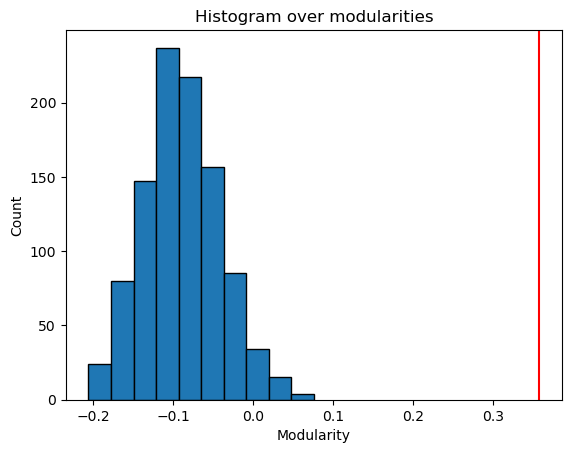

In [13]:
"Plotting a histogram over the distribution values for"

plt.hist(rand_modularities, edgecolor='black')
plt.xlabel('Modularity')
plt.ylabel('Count')
plt.title('Histogram over modularities')
plt.axvline(x=kar_club_modularity, color = "red")
plt.show()

## Exercise 10 : Comment on above figure. Is club split a good partitioning? Why did we do the randomization experiment? What is the reason of preserving the nodes degree?

As we can see, the karate club dataset partitioning is significantly different from the random modularities generated by the randomization experiment, which tells us that we have a good partitioning. 

The point of prserving the nodes degree is to ensure any change was due to a difference in edge distribution, rather than a change in the structure of the network. Changing the degree distribution can significantly change the structure of the network. However, if we simply move some edges around while preserving the degree distribution, we ensure the change is not due to a change in the degree distribution. The point of the randomization experiment is to test the modularity of the network, to see if it is significantly different from what we would see if the edges we're formed at random, given the same degree distribution.

### Check this later ***

## Exercise 11 : Use Louvain-algorithm implementation (by python) to find communities. Calculate modularity. Is it lower or higher than the club split? What does the comparison reveal?

In [28]:

def louvain_communities(graph):
    # Use the louvain method to find communities
    partition = community.best_partition(graph) # community function that uses Louvain-algorithm
    
    # Reformat the partitioning
    communities = {}
    for node, community_id in partition.items():
        if community_id in communities:
            communities[community_id].append(node)
        else:
            communities[community_id] = [node]
    
    return list(communities.values())

In [29]:
karclub_louvain_groups = louvain_communities(karclub_data)

## Exercise 12 : compare the communities of louvain and club split with a matrix D (2 times number of communities found by Louvain). We set D(i,j) to the number of nodes that community i has in common with club split j. The matrix D is a confusion matrix. Use it to explain how well the communities you've detected correspond to the club split partitioning.

In [48]:
def confusion_matrix(community1, community2):
    """
    Creates an unweighted confusion matrix comparing two sets of communities.

    Args:
    - community1: a list of lists, where each inner list contains the nodes in a community
    - community2: a list of lists, where each inner list contains the nodes in a community

    Returns:
    - confusion_matrix: a 2D list representing the confusion matrix
    """

    # Get the number of communities in each list
    n1 = len(community1)
    n2 = len(community2)

    # Create an empty confusion matrix with n1 rows and n2 columns
    confusion_matrix = [[0] * n2 for _ in range(n1)]

    # Loop over each community in community1
    for i, c1 in enumerate(community1):
        # Loop over each community in community2
        for j, c2 in enumerate(community2):
            # Count the number of nodes in common between the two communities
            common_nodes = len(set(c1) & set(c2))
            # Add the count to the confusion matrix
            confusion_matrix[i][j] = common_nodes

    # Print the confusion matrix
    for row in confusion_matrix:
        print(row)

    return confusion_matrix

In [49]:
confusion_matrix(clubs,karclub_louvain_groups)

[11, 5, 1, 0]
[0, 0, 11, 6]


[[11, 5, 1, 0], [0, 0, 11, 6]]

It would seem that Louvain followed almost the same distribution as clubs, however, it did split it further into subgroups, splitting the two clubs into four groups, each with a larger and smaller partitioning.

# Exercise 4 : Community detection on the network of Computational Social Scientists.

## Use Louvain-algorithm. How many communities, what sizes and the modularity found. Is it significantly bigger than zero.

In [81]:
#Importing the graph and removing all the no edge data
CSS_graph = nx.read_graphml('CSS_graph.graphml')
CSS_graph_cc = sorted(nx.connected_components(CSS_graph), key=len, reverse=True)
giant = CSS_graph.subgraph(CSS_graph_cc[0])

In [86]:
CSS_louvain_groups = louvain_communities(giant)

In [87]:
CSS_modularity = modularity(giant, CSS_louvain_groups)

In [103]:
print("The modularity of the CSS graph is " + str(CSS_modularity))
print("There are " + str(len(CSS_louvain_groups)) + " communities")

The modularity of the CSS graph is 0.8671920605046567
There are 67 communities


 -- Below is a histogram of the sizes of the communities -- 


Text(0.5, 1.0, 'Histogram of List of List Lengths')

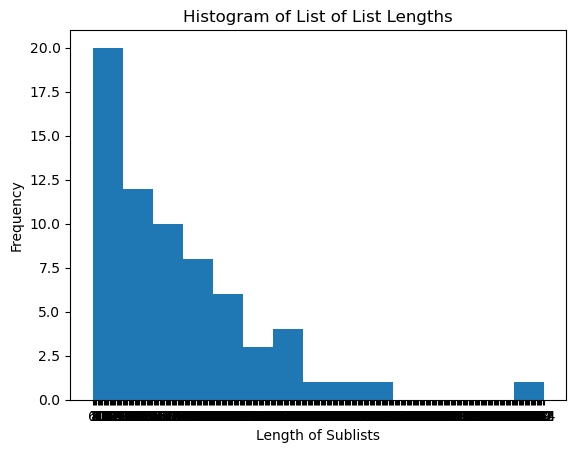

In [105]:
print(" -- Below is a histogram of the sizes of the communities -- ")
community_sizes = [len(sublist) for sublist in CSS_louvain_groups]
plt.hist(community_sizes, bins = 15)
plt.xlabel('Length of Sublists')
plt.ylabel('Frequency')
plt.xticks(range(min(community_sizes), max(community_sizes)+1))
plt.title('Histogram of List of List Lengths')


Is it significantly bigger than 0?

We can see that it is very close to 1, which tells us that it is very likely that it is significantly above 0. However, it may still be worth doing a 1000 fold randomization of models as we did before.

In [111]:
#Set seed in the interest of repeatability
random.seed(69420)
#A list that will contain a thousand randomized modularities
rand_modularities_2 = []

#The loop that produces a thousand edge swapped datasets, and appends them to rand_modularities
#Here we use the previously defined modularity and edge_swap funtions
giant_unfrozen = nx.Graph(giant)
for i in tqdm(range(1)):
    rand_giant = edge_swap(giant_unfrozen, 13046)
    rand_modularities_2.append(modularity(rand_karclub,giant))

  0%|          | 0/1 [00:00<?, ?it/s]